In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('insurance.csv')

In [3]:
df

,Id,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,1,39.0,male,23.2,91,Yes,0,No,southeast,1121.87
1,2,24.0,male,30.1,87,No,0,No,southeast,1131.51
2,3,NaN,male,33.3,82,Yes,0,No,southeast,1135.94
3,4,NaN,male,33.7,80,No,0,No,northwest,1136.40
4,5,NaN,male,34.1,100,No,0,No,northwest,1137.01
...,...,...,...,...,...,...,...,...,...,...
1335,1336,44.0,female,35.5,88,Yes,0,Yes,northwest,55135.40
1336,1337,59.0,female,38.1,120,No,1,Yes,northeast,58571.07
1337,1338,30.0,male,34.5,91,Yes,3,Yes,northwest,60021.40
1338,1339,37.0,male,30.4,106,No,0,Yes,southeast,62592.87


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1340 non-null   int64  
 1   age            1335 non-null   float64
 2   gender         1340 non-null   object 
 3   bmi            1340 non-null   float64
 4   bloodpressure  1340 non-null   int64  
 5   diabetic       1340 non-null   object 
 6   children       1340 non-null   int64  
 7   smoker         1340 non-null   object 
 8   region         1337 non-null   object 
 9   claim          1340 non-null   float64
dtypes: float64(3), int64(3), object(4)
memory usage: 104.8+ KB


In [5]:
df.shape

(1340, 10)

In [6]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [7]:
sns.set(style="whitegrid", palette="Set2", font_scale=1.2)

In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df.isna().sum().sum()

np.int64(8)

In [10]:
df.dropna(inplace=True)

In [11]:
df.shape

(1332, 10)

In [12]:
df.describe(include='all')

,Id,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
count,1332.00,1332.00,1332,1332.00,1332.00,1332,1332.00,1332,1332,1332.00
unique,NaN,NaN,2,NaN,NaN,2,NaN,2,4,NaN
top,NaN,NaN,male,NaN,NaN,No,NaN,No,southeast,NaN
freq,NaN,NaN,670,NaN,NaN,695,NaN,1058,442,NaN
mean,674.47,38.09,NaN,30.66,94.19,NaN,1.10,NaN,NaN,13325.25
std,384.70,11.11,NaN,6.12,11.45,NaN,1.21,NaN,NaN,12109.62
min,1.00,18.00,NaN,16.00,80.00,NaN,0.00,NaN,NaN,1121.87
25%,341.75,29.00,NaN,26.20,86.00,NaN,0.00,NaN,NaN,4760.16
50%,674.50,38.00,NaN,30.35,92.00,NaN,1.00,NaN,NaN,9412.97
75%,1007.25,47.00,NaN,34.73,99.00,NaN,2.00,NaN,NaN,16781.33


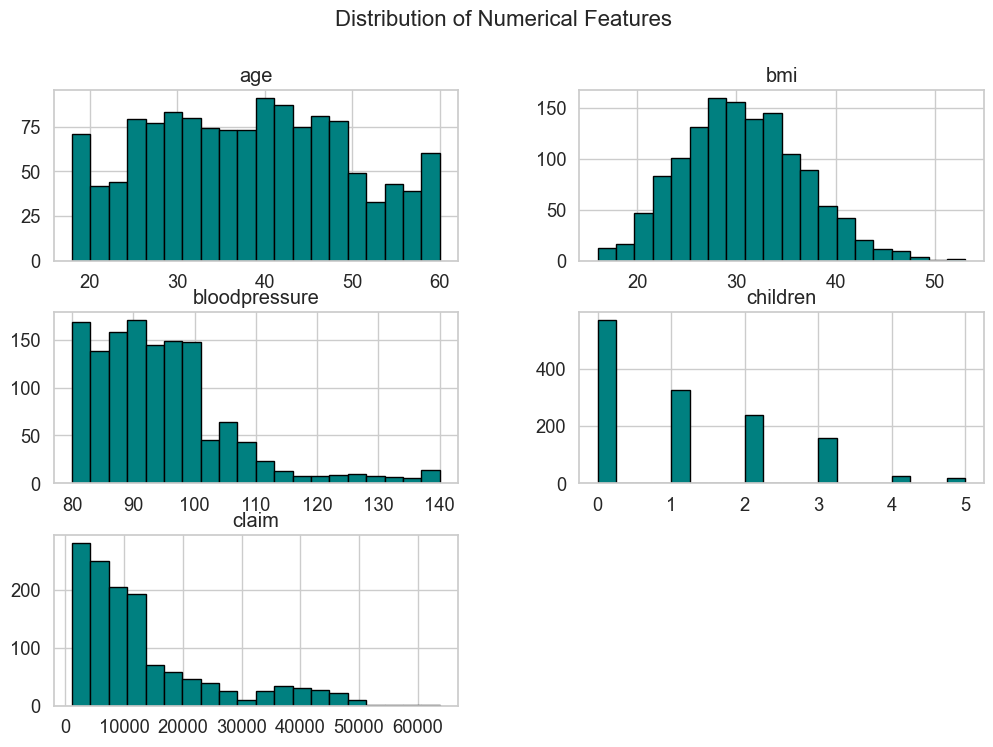

In [13]:
numerical_cols = ["age", "bmi", "bloodpressure", "children", "claim"]
df[numerical_cols].hist(bins=20, figsize=(12, 8), color = 'teal', edgecolor='black')
plt.suptitle('Distribution of Numerical Features', fontsize=16)
plt.show()

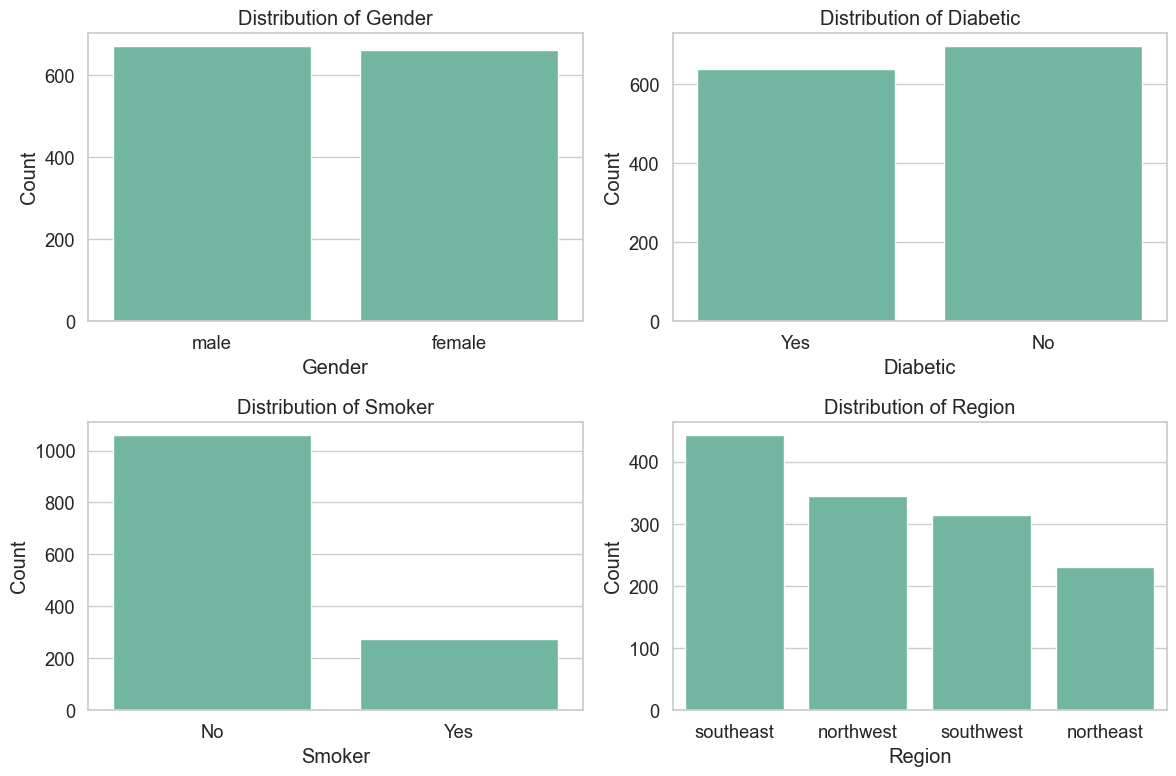

In [14]:
categorical_cols = ["gender", "diabetic", "smoker", "region"]

plt.figure(figsize=(12, 8))

for i, col in enumerate(categorical_cols, 1):
    plt.subplot(2, 2, i)
    sns.countplot(data=df, x=col)
    plt.title(f'Distribution of {col.capitalize()}')
    plt.xlabel(col.capitalize())
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

In [15]:
df.groupby(['gender', 'smoker'])['claim'].mean().round(2)

gender  smoker
female  No        8762.30
        Yes      30679.00
male    No        8169.25
        Yes      33042.01
Name: claim, dtype: float64

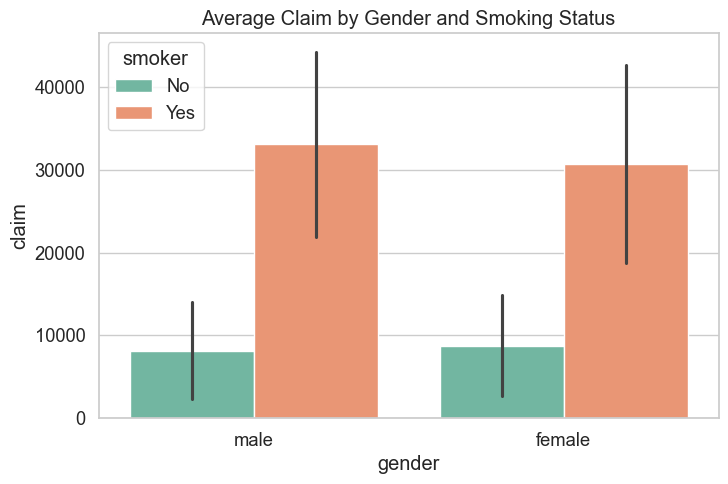

In [16]:
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x='gender', y='claim', hue='smoker',estimator= "mean", errorbar= "sd")
plt.title('Average Claim by Gender and Smoking Status')
plt.show()

In [17]:
pivot_region_diabetic = df.groupby(['region', 'diabetic'])['claim'].mean().unstack()

In [18]:
pivot_region_diabetic

diabetic,No,Yes
region,,
northeast,16966.86,16818.30
northwest,11442.83,12224.96
southeast,13578.72,12574.09
southwest,13069.91,12313.74


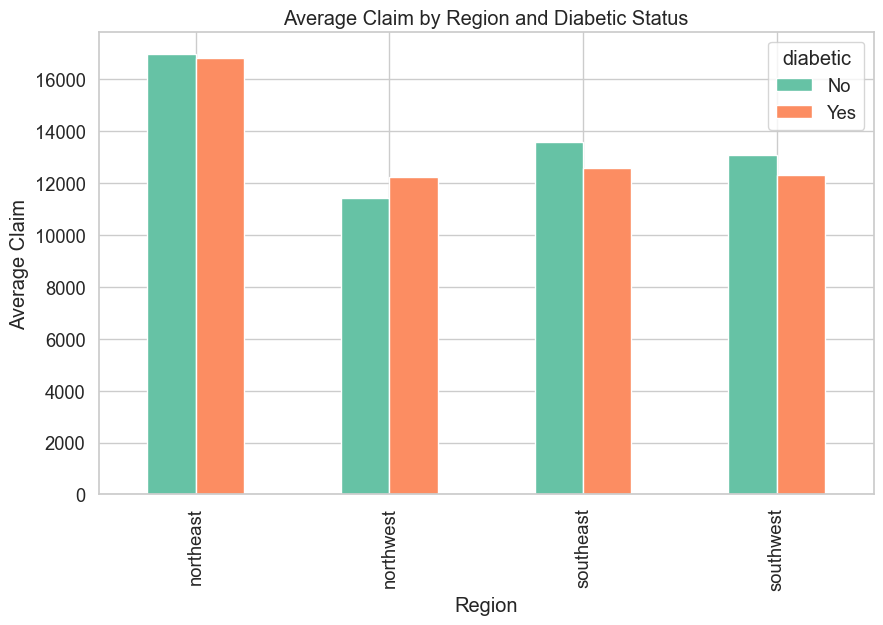

In [19]:
pivot_region_diabetic.plot(kind='bar', figsize=(10, 6))
plt.title('Average Claim by Region and Diabetic Status')
plt.xlabel('Region')
plt.ylabel('Average Claim')
plt.show()

In [20]:
pivot_table = pd.pivot_table(df, values='claim', index='region', columns='smoker', aggfunc='mean')
pivot_table

smoker,No,Yes
region,,
northeast,11666.11,29673.54
northwest,8076.20,30192.00
southeast,7444.14,34845.00
southwest,8294.75,32269.06


In [21]:
pivot_table = pd.pivot_table(df, values='claim', index='children', columns='diabetic', aggfunc='mean')
pivot_table

diabetic,No,Yes
children,,
0,12967.40,11985.29
1,12730.46,12732.06
2,15567.77,14579.36
3,13807.61,17091.26
4,14106.63,13573.35
5,8519.04,9205.59


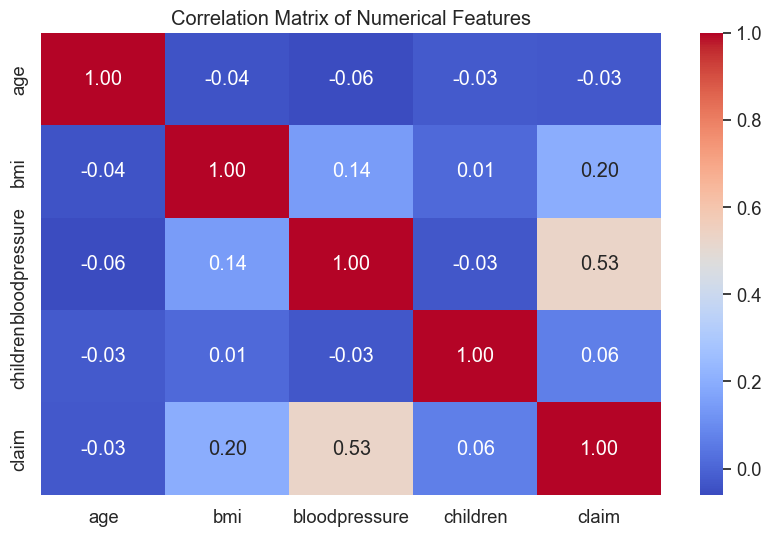

In [22]:
plt.figure(figsize=(10, 6))
sns.heatmap(df[numerical_cols].corr(), cmap = 'coolwarm',annot=True, fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

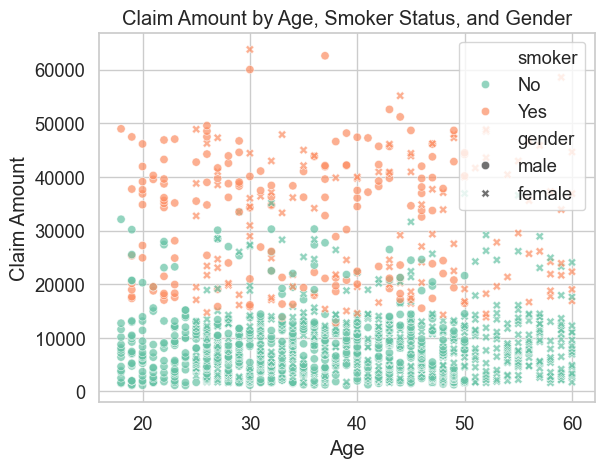

In [23]:
sns.scatterplot(data=df, x = 'age', y = 'claim', hue='smoker', style='gender', alpha=0.7, palette='Set2')
plt.title('Claim Amount by Age, Smoker Status, and Gender')
plt.xlabel('Age')
plt.ylabel('Claim Amount')
plt.show()

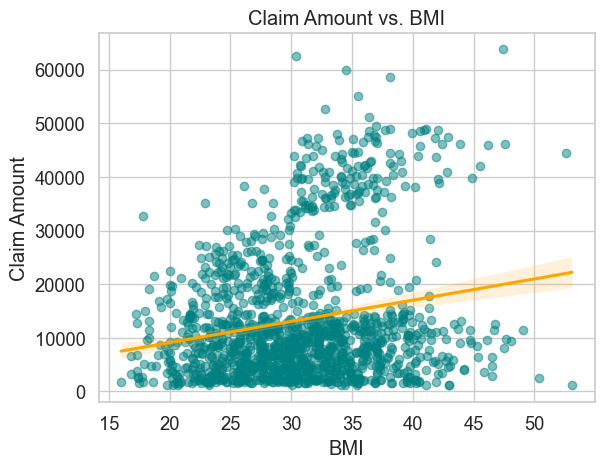

In [24]:
sns.regplot(data=df, x='bmi', y='claim', scatter_kws={'alpha':0.5, 'color':'teal'}, line_kws={'color':'orange'})
plt.title('Claim Amount vs. BMI')
plt.xlabel('BMI')
plt.ylabel('Claim Amount')
plt.show()

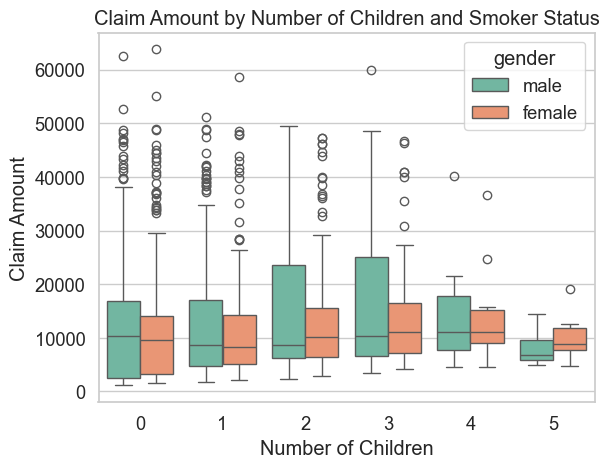

In [25]:
sns.boxplot(data=df, x='children', y='claim', hue='gender')
plt.title('Claim Amount by Number of Children and Smoker Status')
plt.xlabel('Number of Children')
plt.ylabel('Claim Amount')
plt.show()

In [26]:
df['age_group'] = pd.cut(df['age'], bins=[0, 18, 30, 45, 60, 80], labels=['<18', '18-30', '31-45', '46-60', '61+'])

In [27]:
df['age_group'].value_counts().sort_index()

age_group
<18       16
18-30    380
31-45    553
46-60    383
61+        0
Name: count, dtype: int64

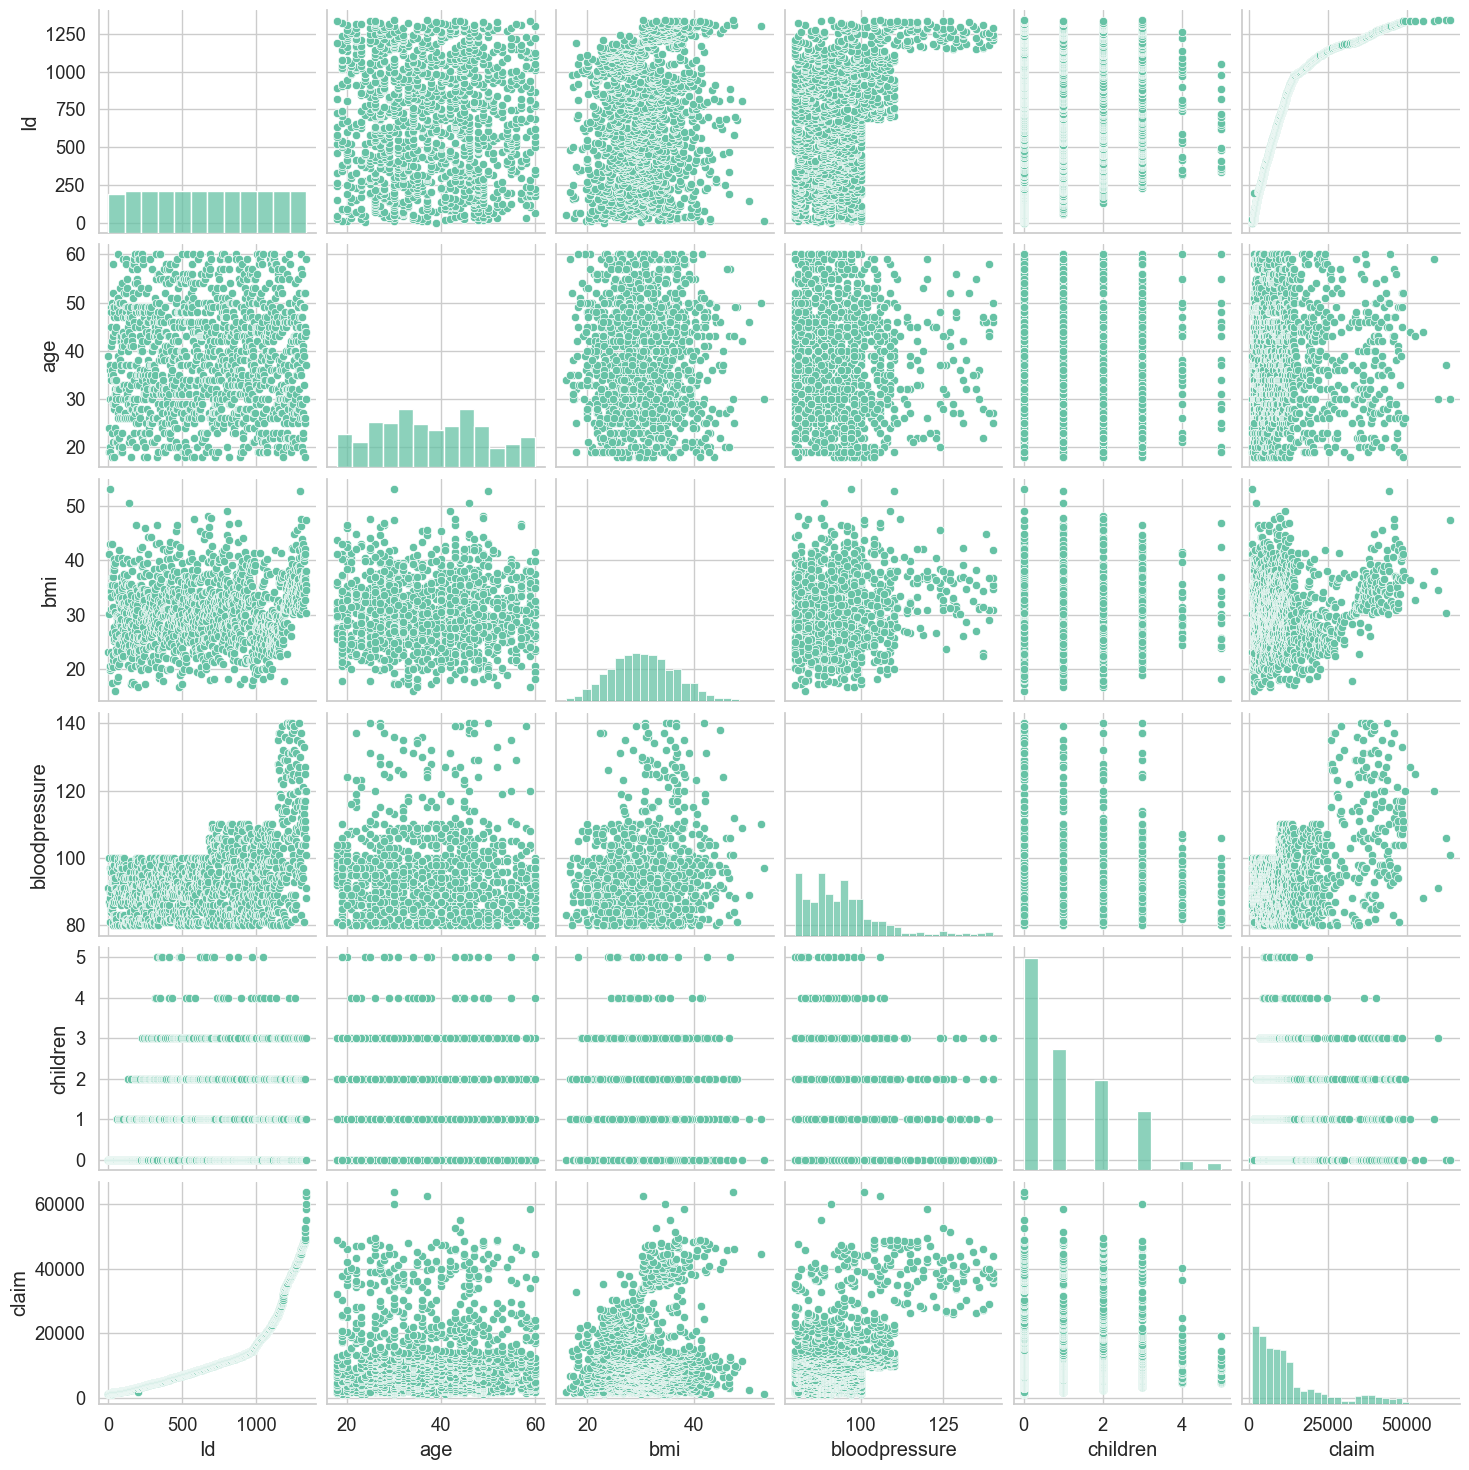

In [28]:
sns.pairplot(df)
plt.show()

Text(0.5, 1.0, 'Average Claim by Age Group')

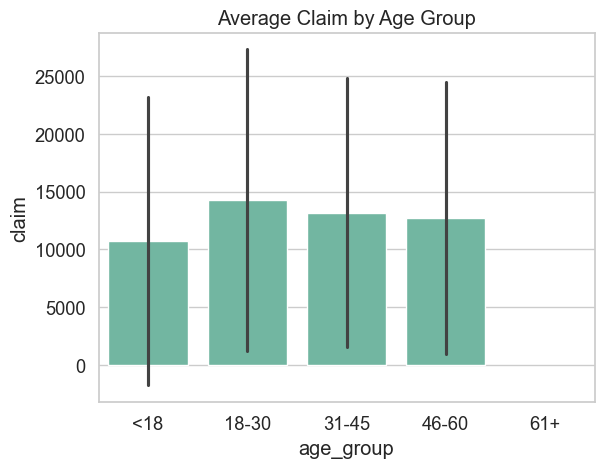

In [29]:
sns.barplot(data=df, x='age_group', y='claim', estimator='mean', errorbar='sd')
plt.title('Average Claim by Age Group')

In [30]:
df["bmi_category"] = pd.cut(df["bmi"], bins=[0, 18.5, 24.9, 29.9, 100], labels=['Underweight', 'Normal weight', 'Overweight', 'Obesity'])
df["bmi_category"].value_counts().sort_index()

bmi_category
Underweight       21
Normal weight    222
Overweight       387
Obesity          702
Name: count, dtype: int64

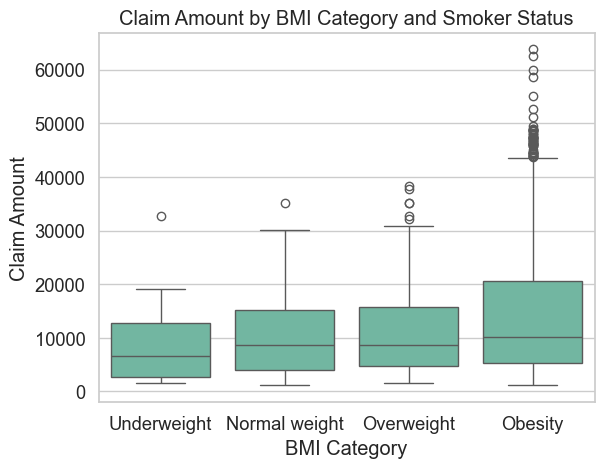

In [31]:
sns.boxplot(data=df, x='bmi_category', y='claim')
plt.title('Claim Amount by BMI Category and Smoker Status')
plt.xlabel('BMI Category')
plt.ylabel('Claim Amount')
plt.show()

In [32]:
region_stats = df.groupby('region').agg(
    smoker_rate = ('smoker', lambda x: (x == 'Yes').mean() * 100),
    avg_claim = ('claim', 'mean')
).reset_index()
region_stats

,region,smoker_rate,avg_claim
0,northeast,29.00,16889.04
1,northwest,16.81,11794.22
2,southeast,20.59,13085.50
3,southwest,18.47,12723.13


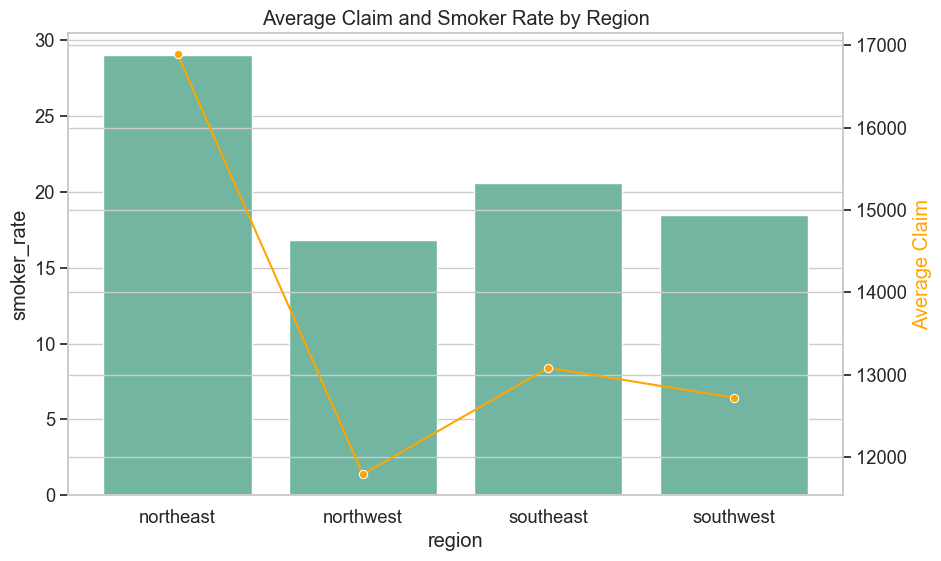

In [33]:
fig, ax1 = plt.subplots(figsize=(10,6))
sns.barplot(data=region_stats, x='region', y='smoker_rate', ax=ax1)
ax1.set_title('Average Claim and Smoker Rate by Region')
ax2 = ax1.twinx()
sns.lineplot(data=region_stats, x='region', y='avg_claim', ax=ax2, color='orange', marker='o')
ax2.set_ylabel('Average Claim', color='orange')
plt.show()

Data Preprocessing & Feature Engineering

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import joblib

In [35]:
df.columns

Index(['Id', 'age', 'gender', 'bmi', 'bloodpressure', 'diabetic', 'children',
       'smoker', 'region', 'claim', 'age_group', 'bmi_category'],
      dtype='object')

In [36]:
X = df[['age', 'gender', 'bmi', 'bloodpressure', 'diabetic', 'children', 'smoker']]
y = df['claim']

In [37]:
X

,age,gender,bmi,bloodpressure,diabetic,children,smoker
0,39.00,male,23.20,91,Yes,0,No
1,24.00,male,30.10,87,No,0,No
7,19.00,male,41.10,100,No,0,No
8,20.00,male,43.00,86,No,0,No
9,30.00,male,53.10,97,No,0,No
...,...,...,...,...,...,...,...
1335,44.00,female,35.50,88,Yes,0,Yes
1336,59.00,female,38.10,120,No,1,Yes
1337,30.00,male,34.50,91,Yes,3,Yes
1338,37.00,male,30.40,106,No,0,Yes


In [38]:
categorical_cols = ['gender', 'diabetic', 'smoker']
label_encoders = {}

In [39]:
for col in categorical_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le

    joblib.dump(le, f'{col}_label_encoder.pkl')

/var/folders/3d/836l2s754cd_tz7m21l756lc0000gn/T/ipykernel_60840/1986591709.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = le.fit_transform(X[col])
/var/folders/3d/836l2s754cd_tz7m21l756lc0000gn/T/ipykernel_60840/1986591709.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = le.fit_transform(X[col])
/var/folders/3d/836l2s754cd_tz7m21l756lc0000gn/T/ipykernel_60840/1986591709.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc

In [40]:
label_encoders

{'gender': LabelEncoder(),
 'diabetic': LabelEncoder(),
 'smoker': LabelEncoder()}

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
numerical_cols = ['age', 'bmi', 'bloodpressure', 'children']
scaler = StandardScaler()

In [43]:
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

In [44]:
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [45]:
print(X_train.shape, y_train.shape)

(1065, 7) (1065,)


In [46]:
print(X_test.shape, y_test.shape)

(267, 7) (267,)


Training Machine Learning Models

In [47]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [48]:
def evaluate_model(model, X_train, X_test, y_train, y_test):
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    return {'R2' : r2, 'MAE': mae, 'RMSE': rmse}

In [49]:
results = {}

In [50]:
lr = LinearRegression()
lr.fit(X_train, y_train)
results['Linear Regression'] = evaluate_model(lr, X_train, X_test, y_train, y_test)
print('Linear Regression model trained and evaluated.')

best_polynomial_model = None
best_polynomial_score = -np.inf

for degree in [2, 3]:
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)


    lr_poly = LinearRegression()
    lr_poly.fit(X_train_poly, y_train)

    score = lr_poly.score(X_test_poly, y_test)

    if score > best_polynomial_score:
        best_polynomial_score = score
        best_polynomial_model = (degree, poly, lr_poly)

degree, poly, lr_poly = best_polynomial_model

X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

results[f'Polynomial Regression (degree={degree})'] = evaluate_model(lr_poly, X_train_poly, X_test_poly, y_train, y_test)
print(f'Polynomial Regression models are trained and evaluated.')

Linear Regression model trained and evaluated.
Polynomial Regression models are trained and evaluated.


In [51]:
rf = RandomForestRegressor(random_state=42)

rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

rf_grid = GridSearchCV(estimator=rf, param_grid=rf_params, cv=3, scoring='r2', n_jobs=-1, verbose=0)
rf_grid.fit(X_train, y_train)
best_rf = rf_grid.best_estimator_
results['Random Forest'] = evaluate_model(best_rf, X_train, X_test, y_train, y_test)
print('Random Forest model trained, best parameters found as follows:', rf_grid.best_params_)

Random Forest model trained, best parameters found as follows: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}


In [52]:
results

{'Linear Regression': {'R2': 0.7186402865210721,
  'MAE': 5034.26319889741,
  'RMSE': np.float64(6368.137982018986)},
 'Polynomial Regression (degree=2)': {'R2': 0.7757814325424963,
  'MAE': 4426.3218151787405,
  'RMSE': np.float64(5684.827554251738)},
 'Random Forest': {'R2': 0.8197888746862211,
  'MAE': 3930.4792221486637,
  'RMSE': np.float64(5096.503275954908)}}

In [53]:
results_df = pd.DataFrame(results).T.sort_values(by='R2', ascending=False)
results_df

,R2,MAE,RMSE
Random Forest,0.82,3930.48,5096.50
Polynomial Regression (degree=2),0.78,4426.32,5684.83
Linear Regression,0.72,5034.26,6368.14


In [54]:
models = {
    'Linear Regression': lr,
    f'Polynomial Regression (degree={degree})': lr_poly,
    'Random Forest': best_rf
}

In [55]:
best_r2 = results_df['R2'].max()
best_r2

np.float64(0.8197888746862211)

In [56]:
top_model = results_df[results_df['R2'] >= best_r2 * 0.95]
top_model

,R2,MAE,RMSE
Random Forest,0.82,3930.48,5096.50


In [57]:
best_model = models[top_model.index[0]]
best_model

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",200
,"criterion criterion: {""squared_error"", ""absolute_error"", ""friedman_mse"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in Poisson deviance to find splits.Training using ""absolute_error"" is significantly slowerthan when using ""squared_error""... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 1.0 Poisson criterion.",'squared_error'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",10
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",5
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",2
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=1.0The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None or 1.0, then `max_features=n_features`... note:: The default of 1.0 is equivalent to bagged trees and more randomness can be achieved by setting smaller values, e.g. 0.3... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to 1.0.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",1.0
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples 

In [58]:
joblib.dump(best_model, 'best_model.pkl')
print(f'Best model selected: {top_model.index[0]}')

Best model selected: Random Forest
